## Clustering Archive

In [1]:
import arxiv
from sentence_transformers import SentenceTransformer
import umap
import nltk
nltk.download('punkt')

c:\Users\marin\anaconda3\envs\clust-arc\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\marin\anaconda3\envs\clust-arc\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
c:\Users\marin\anaconda3\envs\clust-arc\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
c:\Users\marin\anaconda3\envs\clust-arc\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\marin\anaconda3\envs\clust-arc\lib\site-packages\umap\distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. Se

True

### Load the data

Firstly, we import the necessary libraries `urllib` and `BeautifulSoup` for web scraping.

Then, we define a URL to query the arXiv API for papers authored by Akihiko Noda. 

The `urllib.request.urlopen()` function is used to open the URL and retrieve the response, which is then parsed using BeautifulSoup to extract the relevant information. 

Specifically, we retrieve the first 36 results of the query and store them in the `soup_1` object.

In [2]:
import urllib, urllib.request
from bs4 import BeautifulSoup
url_1 = 'https://export.arxiv.org/api/query?search_query=au:akihiko+noda&start=0&max_results=36'
with urllib.request.urlopen(url_1) as response_1:
    soup_1 = BeautifulSoup(response_1, "lxml")

Now we define a URL to query the arXiv API for papers authored by Robert Koenig in the category of quantum physics. 

As before, we retrieve the first 59 results of the query and store them in the `soup_2` object.

In [3]:
url_2 = 'https://export.arxiv.org/api/query?search_query=au:robert+koenig&cat:quant-ph&start=0&max_results=59'
with urllib.request.urlopen(url_2) as response_2:
    soup_2 = BeautifulSoup(response_2, "lxml")

## Preprocessing

Using BeautifulSoup, we can extract the titles of papers authored by Akihiko Noda and Robert Koenig from the arXiv API. 

The `.find_all('title')` function is used to find all the `title` tags in the HTML response. 
The `map()` function is used to apply the `text` method to each `title` tag, which extracts the text content of the tag. 

The `del titles[0]` line is used to remove the first element of the titles list, which is the title of the arXiv query page and not a paper title. 

In [4]:
titles_1 = soup_1.find_all('title')
titles_1 = list(map(lambda x:x.text, titles_1))
del titles_1[0]
len(titles_1)

36

We do the same for the summaries of the papers.

In [5]:
summaries_1 = soup_1.find_all('summary')
summaries_1 = list(map(lambda x:x.text, summaries_1))
len(summaries_1)

36

In [6]:
def retrieve_name_noda(name):
    split_name = name.split(' ', 1)
    return True if split_name[0] == "Akihiko" or split_name[1] == "Noda" else False

In [7]:
names = soup_1.find_all('name')
names = list(map(lambda x:x.text, names))
names = list(filter(retrieve_name_noda, names))

In [8]:
len(names)

36

In [10]:
# soup_1 retrieve: title, summary, names

titles_1 = soup_1.find_all('title')
titles_1 = list(map(lambda x:x.text, titles_1))
del titles_1[0]
print(len(titles_1))

summaries_1 = soup_1.find_all('summary')
summaries_1 = list(map(lambda x:x.text, summaries_1))
print(len(summaries_1))

def retrieve_name_noda(name):
    split_name = name.split(' ', 1)
    return True if split_name[0] == "Akihiko" and split_name[1] == "Noda" else False

names = soup_1.find_all('name')
names = list(map(lambda x:x.text, names))
names = list(filter(retrieve_name_noda, names))

print(len(names))

list_1 = []
for title, summary, name in zip(titles_1, summaries_1, names):
    list_1.append([title, summary, name])

print(len(list_1))

36
36
15
15


'\nakihiko_papers = list()\nfor i in range(len(list_1)):\n    for title, summary in list_1[i][:1]:\n        print(title, summary)\n'

In [11]:
list_1[0]

['Estimating the Time-Varying Structures of the Fama-French Multi-Factor\n  Models',
 "  This study examines the time-varying structures of Fama-French multi-factor\nmodels (Fama and French (1993, 2015, 2016, 2018)) using Ito et al.'s (2022)\ngeneralized least squares-based time-varying multivariate model. Specifically,\nwe employ 25 benchmark portfolios for the U.S., Japan, and Europe to estimate\ntime-varying parameters in those models, with a focus on time stability. We\nfind that model parameters change over time, with differences in time stability\namong the countries/regions.\n",
 'Akihiko Noda']

In [18]:
list_1[0][:2]

['Estimating the Time-Varying Structures of the Fama-French Multi-Factor\n  Models', "  This study examines the time-varying structures of Fama-French multi-factor\nmodels (Fama and French (1993, 2015, 2016, 2018)) using Ito et al.'s (2022)\ngeneralized least squares-based time-varying multivariate model. Specifically,\nwe employ 25 benchmark portfolios for the U.S., Japan, and Europe to estimate\ntime-varying parameters in those models, with a focus on time stability. We\nfind that model parameters change over time, with differences in time stability\namong the countries/regions.\n"]


In [14]:
akihiko_papers = list()
 
for i in list_1:
    title = i[0]
    summary = i[1]
    akihiko_papers.append(title + '.' + '\n\n' + summary)

In [15]:
len(akihiko_papers)

15

In [17]:
print(akihiko_papers[0])

Estimating the Time-Varying Structures of the Fama-French Multi-Factor
  Models.

  This study examines the time-varying structures of Fama-French multi-factor
models (Fama and French (1993, 2015, 2016, 2018)) using Ito et al.'s (2022)
generalized least squares-based time-varying multivariate model. Specifically,
we employ 25 benchmark portfolios for the U.S., Japan, and Europe to estimate
time-varying parameters in those models, with a focus on time stability. We
find that model parameters change over time, with differences in time stability
among the countries/regions.



So, we got the titles and summaries of the papers authored by Akihiko Noda. 

Now we proceed with the same procedure for the papers authored by Robert Koenig.

In [40]:
titles_2 = soup_2.find_all('title')
titles_2 = list(map(lambda x:x.text, titles_2))
del titles_2[0]
print(titles_2[-1])
print(len(titles_2))

Locking of accessible information and implications for the security of
  quantum cryptography
59


In [41]:
summaries_2 = soup_2.find_all('summary')
summaries_2 = list(map(lambda x:x.text, summaries_2))
print(len(summaries_2))

59


Let's check that we have the correct papers by retrieving the author name:

In [51]:
def retrieve_name(name):
    split_name = name.split(' ', 1)
    return True if split_name[0] == "Robert" and split_name[1] == "Koenig" else False

names_2 = soup_2.find_all('name')
names_2 = list(map(lambda x:x.text, names_2))
names_2 = list(filter(retrieve_name, names_2))

print(len(names_2))

list_2 = []
for title, summary, name in zip(titles_2, summaries_2, names_2):
    list_2.append([title, summary, name])

print(len(list_2))

57
57


In [52]:
koenig_papers = list()
 
for i in list_2:
    title = i[0]
    summary = i[1]
    koenig_papers.append(title + '.' + '\n\n' + summary)

In [53]:
print(len(koenig_papers))
print(koenig_papers[0])

57
The conditional entropy power inequality for Gaussian quantum states.

  We propose a generalization of the quantum entropy power inequality involving
conditional entropies. For the special case of Gaussian states, we give a proof
based on perturbation theory for symplectic spectra. We discuss some
implications for entanglement-assisted classical communication over additive
bosonic noise channels.



Now we create a list called papers that contains the titles and summaries of the papers, i. e. we join the two lists together. 

In [61]:
papers = koenig_papers + akihiko_papers

In [62]:
len(papers)

72

In [63]:
print(papers[0])

The conditional entropy power inequality for Gaussian quantum states.

  We propose a generalization of the quantum entropy power inequality involving
conditional entropies. For the special case of Gaussian states, we give a proof
based on perturbation theory for symplectic spectra. We discuss some
implications for entanglement-assisted classical communication over additive
bosonic noise channels.



### Tokenize the text into sentences

We can tokenize the text into sentences using the `sent_tokenize()` function from the `nltk.tokenize` library.

In [64]:
tokenized_papers = [nltk.sent_tokenize(paper) for paper in papers]

In [65]:
tokenized_papers[0]

['The conditional entropy power inequality for Gaussian quantum states.',
 'We propose a generalization of the quantum entropy power inequality involving\nconditional entropies.',
 'For the special case of Gaussian states, we give a proof\nbased on perturbation theory for symplectic spectra.',
 'We discuss some\nimplications for entanglement-assisted classical communication over additive\nbosonic noise channels.']

In [66]:
len(tokenized_papers[0])

4

Count number of sentences in each paper

In [67]:
num_sentences = [len(paper) for paper in tokenized_papers]
num_sentences[0]

4

In [68]:
print(num_sentences)

[4, 6, 5, 4, 5, 6, 6, 6, 5, 5, 4, 4, 12, 9, 11, 9, 7, 7, 6, 6, 8, 7, 5, 8, 7, 9, 6, 7, 7, 6, 6, 9, 11, 9, 9, 7, 9, 7, 6, 7, 9, 6, 5, 6, 7, 8, 7, 6, 7, 6, 7, 10, 12, 13, 9, 12, 9, 5, 5, 5, 5, 6, 5, 6, 4, 7, 4, 7, 8, 6, 7, 11]


We remove the papers that are too short, i.e. less than 3 sentences in the abstract.

In [72]:
valid_papers = list()
for i in range(len(papers)):
    if num_sentences[i] > 4:
        valid_papers.append(papers[i])

In [73]:
tokenized_valid_papers = [nltk.sent_tokenize(paper) for paper in valid_papers]

In [74]:
len(tokenized_valid_papers)

66

In [75]:
import numpy as np
vidx = np.argmin([len(paper) for paper in tokenized_valid_papers])
print(vidx)

1


In [76]:
print(valid_papers[vidx])
print(len(tokenized_valid_papers[vidx]))

Composite anyon coding and the initialization of a topological quantum
  computer.

  Schemes for topological quantum computation are usually based on the
assumption that the system is initially prepared in a specific state. In
practice, this state preparation is expected to be challenging as it involves
non-topological operations which heavily depend on the experimental realization
and are not naturally robust against noise. Here we show that this assumption
can be relaxed by using composite anyons: starting from an unknown state with
reasonable physical properties, it is possible to efficiently distill suitable
initial states for computation purely by braiding. This is achieved by encoding
logical information in a subsystem code with gauge system corresponding to the
internal degrees of freedom of composite objects.

5


Now we have 66 papers with at least 5 sentences each. 

### Embeddings

Now we initialize a `embeddings` list. 

The `SentenceTransformer` function is used to load a pre-trained model named 'all-MiniLM-L6-v2'. 

This model is used to encode each tokenized paper in the `tokenized_valid_papers` list into a dense vector representation, which is then appended to the `embeddings` list. 

At the end of the loop, the `embeddings` list contains the encoded vector representations of all the tokenized papers in the `tokenized_valid_papers` list.

In [77]:
embeddings = list()
model = SentenceTransformer('all-MiniLM-L6-v2')
for token_paper in tokenized_valid_papers:
    embeddings.append(model.encode(token_paper))

The `umap.UMAP()` function is used to initialize a UMAP object with the specified parameters, including the number of neighbors to use in the UMAP algorithm, the initialization method, and the number of components to reduce the embeddings to. 

The `map()` function is then used to apply the `fit_transform()` method of the UMAP object to each embedding in the `embeddings` list. This method fits the UMAP model to the embedding and then transforms it into a lower-dimensional space. The resulting UMAP embeddings are then stored in the `umap_embeddings` list. 

At the end of the loop, the `umap_embeddings` list contains the UMAP embeddings for all the embeddings in the `embeddings` list.

In [78]:
reducer = umap.UMAP(n_neighbors=2, init='random', n_components=2)
umap_embeddings=list(map(lambda x:reducer.fit_transform(x), embeddings))

Now we compute the centers of the embeddings.

In [79]:
centers = list()
for embedding in umap_embeddings:
    centers.append([np.mean(embedding[:, 0]), np.mean(embedding[:, 1])])

In [80]:
print(len(centers))
print(len(centers[0]))

66
2


We can plot a scatterplot of the centers to see the clusters.

In [81]:
new_centers = np.array(centers, dtype=object)
new_centers.shape

(66, 2)

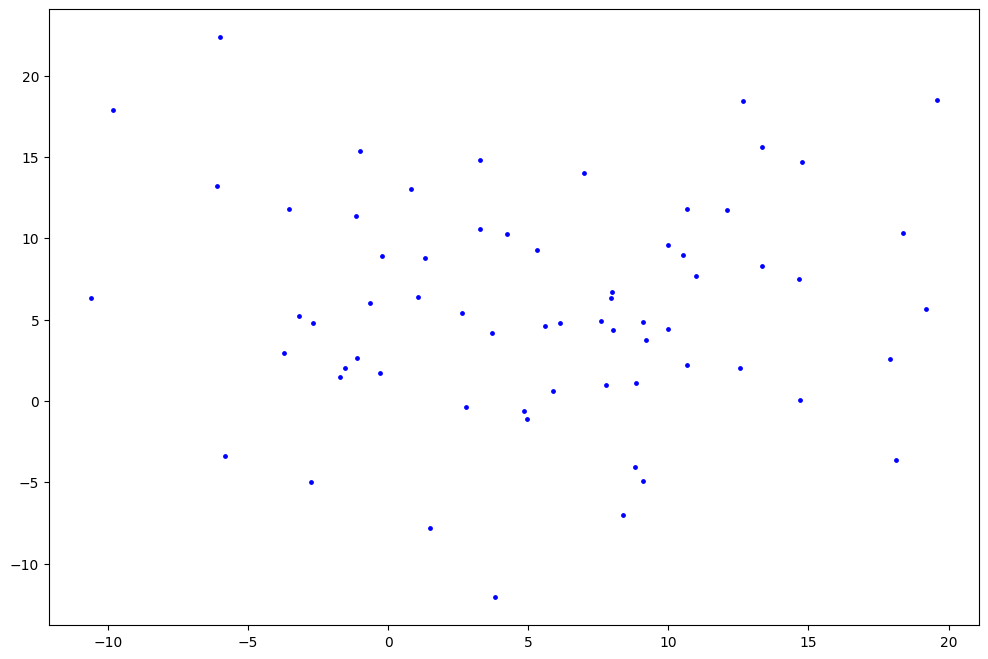

In [82]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
plt.scatter(new_centers[:,0], new_centers[:,1], s=6, c='blue')
plt.show()

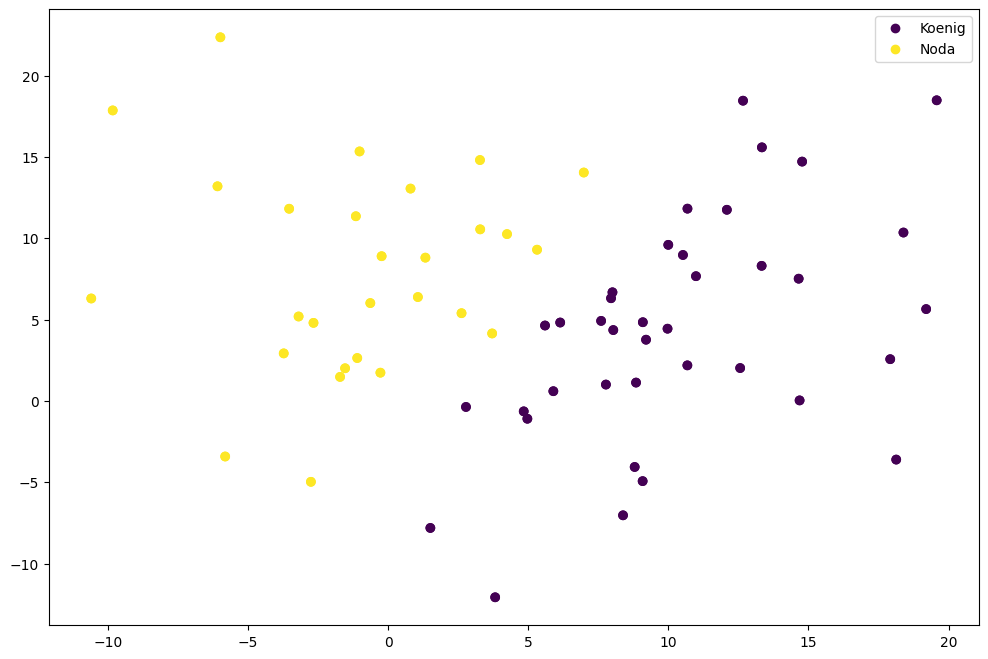

In [83]:
# Let's apply k-means clustering with k=2
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0).fit(new_centers)

# Let's plot the clusters
plt.figure(figsize=(12,8))
plt.scatter(new_centers[:,0], new_centers[:,1], c=kmeans.labels_, cmap='viridis')
plt.legend(handles=plt.scatter(new_centers[:, 0], new_centers[:, 1], c=kmeans.labels_, cmap='viridis').legend_elements()[0], labels=['Koenig', 'Noda'])
plt.show()

In [85]:
for i, (embedding, paper) in enumerate(zip(umap_embeddings, valid_papers)):
    print(f"Paper ID: {i + 1}")
    print(f"Title: {paper.split('.')[0]}")
    print("-" * 50)

Paper ID: 1
Title: Simplifying quantum double Hamiltonians using perturbative gadgets
--------------------------------------------------
Paper ID: 2
Title: Composite anyon coding and the initialization of a topological quantum
  computer
--------------------------------------------------
Paper ID: 3
Title: On Exchangeable Continuous Variable Systems
--------------------------------------------------
Paper ID: 4
Title: A most compendious and facile quantum de Finetti theorem
--------------------------------------------------
Paper ID: 5
Title: Anyonic entanglement renormalization
--------------------------------------------------
Paper ID: 6
Title: Classical simulation of dissipative fermionic linear optics
--------------------------------------------------
Paper ID: 7
Title: Generating topological order: no speedup by dissipation
--------------------------------------------------
Paper ID: 8
Title: Universally composable privacy amplification against quantum adversaries
---------------